In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

faire une boucle pour toutes les varaibles pareils
mettre pltôt en base canique les variables qui n'ont pas de hiérarchie cardinale 

In [236]:
df = pd.read_csv("df.csv")
df1 = pd.read_csv('cis1')
df2 = pd.read_csv('cis2')
df3 = pd.read_csv('cis3')
df4 = pd.read_csv('cis4')
df5 = pd.read_csv('cis5')
df6 = pd.read_csv('cis6')
df7 = pd.read_csv('cis7')

In [237]:
frames = [df, df1, df2, df3, df4, df5, df6, df7]

In [238]:
df = pd.concat(frames)



In [239]:
print(df.columns.tolist())
#permet de visualiser toutes les variables 

['Service_x', 'Length', 'Price', 'ID', 'Agency', 'City', 'Phone', 'Incall/Outcall', 'On Time', 'Porn Star', 'Languages', 'Service_y', 'Other City Serviced', 'Phone Type', 'Smokes', 'Availability', 'Services Delivered As Promised', 'Build', 'Ethnicity', 'Age', 'Eye Color', 'Hair Color', 'Hair Type', 'Hair Length', 'Piercings', 'Pussy', 'Photo Accurate', 'Height', 'Transsexual', 'Breast Size', 'Breast Cup', 'Breast Implants', 'Breast Appearance', 'Tattoos', '_x', 'Massage', 'Sex', 'Blow Job', 'Cum In Mouth', 'Touch Pussy', 'Kiss', 'Two Girl Action', 'More Than One Guy At A Time', 'Multiple Pops Allowed', 'Squirt', 'Female Condom', 'Massage Quality', 'S&M', 'Lick Pussy', 'Anal', 'Will Bring Second Provider', 'Full, No-Rush Session', 'Rimming', 'Allow Film Or Picture', '_y', 'Unnamed: 55', 'Transsexual Functionality', 'Transsexual Versatility', 'Transsexual Cock Size (when Erect)', 'Transsexual Circumcised', 'Transsexual Ejaculates', 'Phone\xa02', 'Phone 2 Type', 'Agency Name', 'Unnamed: 0

In [240]:
pd.options.display.max_columns = None
display(df)
#Pour afficher l'ensemble des colonnes

,Service_x,Length,Price,ID,Agency,City,Phone,Incall/Outcall,On Time,Porn Star,Languages,Service_y,Other City Serviced,Phone Type,Smokes,Availability,Services Delivered As Promised,Build,Ethnicity,Age,Eye Color,Hair Color,Hair Type,Hair Length,Piercings,Pussy,Photo Accurate,Height,Transsexual,Breast Size,Breast Cup,Breast Implants,Breast Appearance,Tattoos,_x,Massage,Sex,Blow Job,Cum In Mouth,Touch Pussy,Kiss,Two Girl Action,More Than One Guy At A Time,Multiple Pops Allowed,Squirt,Female Condom,Massage Quality,S&M,Lick Pussy,Anal,Will Bring Second Provider,"Full, No-Rush Session",Rimming,Allow Film Or Picture,_y,Unnamed: 55,Transsexual Functionality,Transsexual Versatility,Transsexual Cock Size (when Erect),Transsexual Circumcised,Transsexual Ejaculates,Phone 2,Phone 2 Type,Agency Name,Unnamed: 0,Unnamed: 56,Unnamed: 58,Unnamed: 5,Unnamed: 57
0,Escort Incall,30 minutes,$200,1,Don't know,"Baltimore, MD",(267) 248-9429(267) 248-9429,Incall,Yes,No,"English, Spanish",None,None,Text Message,No,Don't Know,Yes,Curvy,Latina,21 - 25,Brown,Black,Straight,Mid Back,Don't Know,Shaved,Photos accurate,"5'6"" - 5'8""",Yes - Postop,34-35,C,Yes,Rock Hard,Don't Know,NaN,Don't Know,Yes,Yes - Without Condom,Don't Know,Don't Know,Yes - With Tongue,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Yes,Don't Know,Don't Know,Receive - Yes,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Escort Outcall,60 minutes,$150,1,Independent,"Tijuana, Mexico",(557) 439-4818(557) 439-4818,Incall/Outcall,Yes,No,Spanish,None,None,Other,No,Daytime/Nighttime,Yes,Average,Spanish,26 - 30,Black,Black,Straight,Mid Back,Don't Know,Don't Know,Photos accurate,"4'9"" - 4'11""",Yes - Postop,34-35,D,Yes,Rock Hard,Don't Know,NaN,No,Yes,Yes - Without Condom,Don't Know,Don't Know,Yes - With Tongue,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Yes,Don't Know,Don't Know,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escort Incall,60 minutes,$300,1,Don't know,"Boston, MA",(617) 932-5556(617) 932-5556,Incall,Yes,No,English,Escort/Massage,None,Provider Picks Up,No,Don't Know,Yes,Curvy,Asian,26 - 30,Brown,Brown,Straight,Shoulder Length,None,Partially Shaved,Photos accurate,"5'6"" - 5'8""",Yes - Postop,34-35,C,Yes,Super Nice,A Few,NaN,Yes - Topless,Yes,Yes - Without Condom,Don't Know,Yes - On The Outside,No,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Average,Don't Know,Yes,Yes,Don't Know,Yes,Don't Know,Don't Know,NaN,Massage and Blow Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escort Incall,30 minutes,$300,1,Don't know,"Los Angeles, CA",(323) 364-5987(323) 364-5987,Incall,Yes,No,English,Escort/Massage,None,Text Message,No,Daytime,Yes,Slender,Asian,21 - 25,Brown,Black,Straight,Mid Back,Don't Know,Shaved,Photos accurate,"5'6"" - 5'8""",Yes - Postop,34-35,C,Yes,Super Nice,Don't Know,NaN,Yes - Topless,Yes,Don't Know,Don't Know,Yes - On The Outside,No,Don't Know,Don't Know,No,Don't Know,Don't Know,Average,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,NaN,Massage Hand Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Massage,45 minutes,$300,1,Agency,"Van Nuys, CA",(310) 862-6106(310) 862-6106,Incall,No,No,English,Escort/Massage,None,Text Message,Yes - But Not During Session,Daytime/Nighttime,No,Very muscular,White,41 - 45,Green,Other,Other,Mid Back,Belly Button,Don't Know,Not accurate (Photoshopped),"5'3"" - 5'5""",Yes - Postop,Smaller Than 30,FLAT,No,Flat,Many,NaN,Yes - Topless,Don't Know,No,Don't Know,No,No,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Below Average,No,No,Don't Know,Don't Know,No,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [241]:
len(df['Phone'].unique())

23178

In [242]:
df = df.drop_duplicates(subset=['Phone'])
df.drop(["Phone"], axis = 1, inplace = True) 

#### Création de deux variables codant l'une pour l'Etat et l'autre seulement le pays 

In [243]:
df['States']=[text.partition(',')[2] for text in df['City']]
df.loc[df["States"] == " D.C., DC", "States"] = ' DC'

### La variable States garde soit le pays pour les villes hors des Etats-Unis soit l'Etat


df['pays'] = 0
for i in range(len(df['States'])) : 
    if len(df['States'].iloc[i]) == 3 : 
        df['pays'].iloc[i] = 'US'
    elif len(df['States'].iloc[i]) >2 :
        df['pays'].iloc[i] = df['States'].iloc[i]

#### La variable pays regroupe tous les Etats dans une seule valeur US 

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### On ne garde que les lignes où on a les prix

In [244]:
print(df['Price'].unique())

df['Price'].isnull().sum()

df['Price'].replace('', np.nan, inplace=True)
df.dropna(subset=['Price'], inplace=True)

['$200' '$150' '$300' '$130' '$500' '$400' '$600' '$250' '$1000' '$100'
 '$350' '$90' '$165' '$140' '$2' '$160' '$190' '$120' '$240' '$450' '$180'
 '$50' '$0' '$40' '$380' '$950' '$60' '$225' '$260' '$1500' '$80' '$700'
 '$2000' '$550' '$170' '$125' '$220' '$175' '$95' '$360' '$70' '$65'
 '$900' '$85' '$45' '$325' '$280' '$169' '$800' '$3' '$110' '$35' '$275'
 '$750' '$209' '$480' '$3000' '$650' '$6000' '$15000' '$1200' '$7000'
 '$145' '$75' '$2500' '$135' '$1300' '$250000' '$5000' '$210000' '$230'
 '$310' '$35000' '$460' '$25' '$330' '$320' '$30' '$189' '$195' '$375'
 '$199' '$210' '$215' '$115' '$105' '$285' '$270' '$155' '$420' '$370'
 '$185' '$1700' '$1100' '$410' '$340' '$1320' '$8000' '$2200' '$1600'
 '$470' '$2100' '$244' '$430' '$5500' '$1400' '$850' '$4500' '$440'
 '$4000' '$25000' '$525' '$425' nan '$2300' '$725' '$618' '$2600' '$295'
 '$40000' '$30800' '$4' '$2700' '$89' '$32000' '$872' '$490' '$1900' '$68'
 '$1800' '$3750' '$1' '$5000000' '$9000' '$3200' '$10000' '$1045' '$

#### Encodage de nos données 

In [245]:
labelencoder=LabelEncoder()
#Par ordre alphabétique 

In [246]:
#2) Length
print(df['Length'].unique())

Length_to_length= {
"30 minutes": 30,
"60 minutes": 60,
"nan":"nan",
"9 hours": 540,
'1 hour 30 minutes':90,
"3 hours":180,
'2 hours':120,
'15 minutes':15,
'4 hours' :240,
'10 hours':600,
'45 Minutes':45,
'2 days': 2880,
'60 minutes ':60,
'15 Minutes':15,
'12 hours':720 ,
'3 days':4320,
'45 minutes':45,
'45 Minutes ':45,
'60 Minutes': 60,
'6 hours' : 360,
'5 hours' : 300,
'8 hours': 480,
'1 day': 1440,
'30 Minutes': 30,
'4 days': 5760 }

df["Length"] = df["Length"].map(Length_to_length)

['30 minutes' '60 minutes' '45 minutes' '9 hours' '1 hour 30 minutes'
 '3 hours' '2 hours' '15 minutes' '4 hours' '10 hours' '45 Minutes'
 '2 days' '60 minutes ' '15 Minutes' '3 days' '45 Minutes ' '12 hours'
 '6 hours' '5 hours' '8 hours' '1 day' '60 Minutes' '30 Minutes' '4 days']


In [247]:
#3) Price
print(df['Price'].unique())

df['Price']=pd.to_numeric([s.lstrip('$') for s in df['Price']])


df = df.loc[(df["Price"] < 50000)]

df = df.loc[(df["Price"] > 9)]

df.drop(["ID"], axis = 1, inplace = True) 

['$200' '$150' '$300' '$130' '$500' '$400' '$600' '$250' '$1000' '$100'
 '$350' '$90' '$165' '$140' '$2' '$160' '$190' '$120' '$240' '$450' '$180'
 '$50' '$0' '$40' '$380' '$950' '$60' '$225' '$260' '$1500' '$80' '$700'
 '$2000' '$550' '$170' '$125' '$220' '$175' '$95' '$360' '$70' '$65'
 '$900' '$85' '$45' '$325' '$280' '$169' '$800' '$3' '$110' '$35' '$275'
 '$750' '$209' '$480' '$3000' '$650' '$6000' '$15000' '$1200' '$7000'
 '$145' '$75' '$2500' '$135' '$1300' '$250000' '$5000' '$210000' '$230'
 '$310' '$35000' '$460' '$25' '$330' '$320' '$30' '$189' '$195' '$375'
 '$199' '$210' '$215' '$115' '$105' '$285' '$270' '$155' '$420' '$370'
 '$185' '$1700' '$1100' '$410' '$340' '$1320' '$8000' '$2200' '$1600'
 '$470' '$2100' '$244' '$430' '$5500' '$1400' '$850' '$4500' '$440'
 '$4000' '$25000' '$525' '$425' '$2300' '$725' '$618' '$2600' '$295'
 '$40000' '$30800' '$4' '$2700' '$89' '$32000' '$872' '$490' '$1900' '$68'
 '$1800' '$3750' '$1' '$5000000' '$9000' '$3200' '$10000' '$1045' '$1350

#### YMMV your mileage may vary, dépend de la situation, peut être mettre 0.5

In [248]:
#9) Languages

#print(df['Languages'].unique())


In [249]:
#10) service_y

In [250]:
print(df['Service_y'].unique())

['None' 'Escort/Massage' 'Massage' 'Escort' 'Escort/Massage/S&M'
 'Escort/S&M' 'S&M' 'Massage/S&M']


In [251]:
df.rename(columns={'Unnamed: 5': 'Service_z'}, inplace=True)

df['Unnamed: 56'].unique()

df['Unnamed: 57'].unique()

df['Unnamed: 58'].unique()

array([nan, 'Escort Outcall', 'Escort ', 'Escort Incall', 'S&M ',
       'Escort And Dinner Date', 'Massage ', 'Massage Hand Job',
       'Massage Nude', 'Escort Second Pop', 'Escort And Anal',
       'Massage Topless', 'Massage Body to Body', 'S&M With Another Girl',
       'Massage Sensual Domination', 'Massage Tantra',
       'Massage and Blow Job', 'Escort With another Girl'], dtype=object)

In [252]:
df.drop(["_x"], axis = 1, inplace = True) 

df.drop(["_y"], axis = 1, inplace = True) 

df.drop(["Unnamed: 0"], axis = 1, inplace = True) 
 

df.drop(["Phone 2 Type"], axis = 1, inplace = True)

df['Phone Type']=labelencoder.fit_transform(df['Phone Type'])

df['Smokes']=labelencoder.fit_transform(df['Smokes'])

df['Availability']=labelencoder.fit_transform(df['Availability'])

df['Services Delivered As Promised']=labelencoder.fit_transform(df['Services Delivered As Promised'])

df['Build']=labelencoder.fit_transform(df['Build'])

df['Ethnicity']=labelencoder.fit_transform(df['Ethnicity'])

df['Age']=labelencoder.fit_transform(df['Age'])

df['Eye Color']=labelencoder.fit_transform(df['Eye Color'])

df['Hair Color']=labelencoder.fit_transform(df['Hair Color'])

df['Hair Type']=labelencoder.fit_transform(df['Hair Type'])

df['Piercings']=labelencoder.fit_transform(df['Piercings'])

df['Hair Length']=labelencoder.fit_transform(df['Hair Length'])

df['Pussy']=labelencoder.fit_transform(df['Pussy'])

df['Photo Accurate']=labelencoder.fit_transform(df['Photo Accurate'])

df['Height']=labelencoder.fit_transform(df['Height'])

df['Transsexual']=labelencoder.fit_transform(df['Transsexual'])

df['Breast Size']=labelencoder.fit_transform(df['Breast Size'])

df['Breast Cup']=labelencoder.fit_transform(df['Breast Cup'])

df['Breast Implants']=labelencoder.fit_transform(df['Breast Implants'])

df['Breast Appearance']=labelencoder.fit_transform(df['Breast Appearance'])

df['Tattoos']=labelencoder.fit_transform(df['Tattoos'])

df['Massage']=labelencoder.fit_transform(df['Massage'])

df['Sex']=labelencoder.fit_transform(df['Sex'])

df['Blow Job']=labelencoder.fit_transform(df['Blow Job'])

df['Cum In Mouth']=labelencoder.fit_transform(df['Cum In Mouth'])

df['Touch Pussy']=labelencoder.fit_transform(df['Touch Pussy'])

df['Kiss']=labelencoder.fit_transform(df['Kiss'])

df['Two Girl Action']=labelencoder.fit_transform(df['Two Girl Action'])

df['More Than One Guy At A Time']=labelencoder.fit_transform(df['More Than One Guy At A Time'])

df['Multiple Pops Allowed']=labelencoder.fit_transform(df['Multiple Pops Allowed'])

df['Squirt']=labelencoder.fit_transform(df['Squirt'])

df['Female Condom']=labelencoder.fit_transform(df['Female Condom'])

df['Massage Quality']=labelencoder.fit_transform(df['Massage Quality'])

df['S&M']=labelencoder.fit_transform(df['S&M'])

df['Lick Pussy']=labelencoder.fit_transform(df['Lick Pussy'])

df['Anal']=labelencoder.fit_transform(df['Anal'])

df['Will Bring Second Provider']=labelencoder.fit_transform(df['Will Bring Second Provider'])

df['Full, No-Rush Session']=labelencoder.fit_transform(df['Full, No-Rush Session'])

df['Rimming']=labelencoder.fit_transform(df['Rimming'])

df['Allow Film Or Picture']=labelencoder.fit_transform(df['Allow Film Or Picture'])

df['Transsexual Functionality']=labelencoder.fit_transform(df['Transsexual Functionality'])

df['Transsexual Functionality']=labelencoder.fit_transform(df['Transsexual Functionality'])

df['Transsexual Versatility']=labelencoder.fit_transform(df['Rimming'])

df['Transsexual Cock Size (when Erect)']=labelencoder.fit_transform(df['Transsexual Cock Size (when Erect)'])

df['Transsexual Circumcised']=labelencoder.fit_transform(df['Transsexual Circumcised'])

df['Transsexual Ejaculates']=labelencoder.fit_transform(df['Transsexual Ejaculates'])

df['pays'] = labelencoder.fit_transform(df['pays'])

df['States'] = labelencoder.fit_transform(df['States'])

df['Rimming']=labelencoder.fit_transform(df['Rimming'])

df['Agency Name']=labelencoder.fit_transform(df['Agency Name'])

df['Languages']=labelencoder.fit_transform(df['Languages'])

df['Other City Serviced']=labelencoder.fit_transform(df['Other City Serviced'])

#4) Agency
print(df['Agency'].unique())

agency = {
"Independent": 0,
"Agency": 1,
"Driver":2,
"Don't know": "nan"}
# Eviter les mélanges de majuscules minuscules
# en mettant tout en minuscule
df["Agency"] = df["Agency"].map(agency)


#5) City

df['City']=labelencoder.fit_transform(df['City'])
#Permet de donner des valeurs à toutes les villes différentes

df['City']

#6) Incall/outcall
print(df['Incall/Outcall'].unique())

incall = {
"Incall": 1,
"Incall/Outcall": 0.5,
"Outcall":0,
"nan": "nan"}
# Eviter les mélanges de majuscules minuscules
# en mettant tout en minuscule
df["Incall/Outcall"] = df["Incall/Outcall"].map(incall)


#7) On Time
print(df['On Time'].unique())

df['On Time'] = df['On Time'].map(dict(Yes=1, No=0))

#8) Porn Star

print(df['Porn Star'].unique())
#On va chercher à donner une valeur à don't know=Nan (le faire sur l'ensemble de la base)

Porn_to_porn = {
"Yes": 1,
"No": 0,
"Don't know": "nan",
"nan": "nan",}
# Eviter les mélanges de majuscules minuscules
# en mettant tout en minuscule
df["Porn Star"] = df["Porn Star"].map(Porn_to_porn)




#1) Service x
print(df['Service_x'].unique())

df['Service_x']=labelencoder.fit_transform(df['Service_x'])

In [260]:
df.rename(columns={'Incall/Outcall': 'Incall'},inplace=True)

df.rename(columns={'On Time': 'On_Time'},inplace=True)
df.rename(columns={'Porn Star': 'Porn_Star'},inplace=True)
df.rename(columns={'Phone Type': 'Phone_Type'},inplace=True)
df.rename(columns={'Services Delivered As Promised': 'Services_Delivered_As_Promised'},inplace=True)
df.rename(columns={'Eye Color': 'Eye_Color'},inplace=True)
df.rename(columns={'Hair Color': 'Hair_Color'},inplace=True)
df.rename(columns={'Hair Type': 'Hair_Type'},inplace=True)
df.rename(columns={'Hair Length': 'Hair_Length'},inplace=True)
df.rename(columns={'Photo Accurate': 'Photo_Accurate'},inplace=True)
df.rename(columns={'Breast Size': 'Breast_Size'},inplace=True)
df.rename(columns={'Breast Cup': 'Breast_Cup'},inplace=True)
df.rename(columns={'Breast Appearance': 'Breast_Appearance'},inplace=True)
df.rename(columns={'Blow Job': 'Blow_Job'},inplace=True)
df.rename(columns={'Cum In Mouth': 'Cum_In_Mouth'},inplace=True)
df.rename(columns={'Touch Pussy': 'Touch_Pussy'},inplace=True)
df.rename(columns={'Two Girl Action': 'Two_Girl_Action'},inplace=True)
df.rename(columns={'More Than One Guy At A Time': 'More_Than_One_Guy_At_A_Time'},inplace=True)
df.rename(columns={'Multiple Pops Allowed': 'Multiple_Pops_Allowed'},inplace=True)
df.rename(columns={'Female Condom': 'Female_Condom'},inplace=True)
df.rename(columns={'Massage Quality': 'Massage_Quality'},inplace=True)
df.rename(columns={'S&M': 'S_M'},inplace=True)
df.rename(columns={'Lick Pussy': 'Lick_Pussy'},inplace=True)
df.rename(columns={'Will Bring Second Provider': 'Will_Bring_Second_Provider'},inplace=True)
df.rename(columns={'Blow Job': 'Blow_Job'},inplace=True)
df.rename(columns={'Full, No-Rush Session': 'Full_No_Rush_Session'},inplace=True)
df.rename(columns={'Allow Film Or Picture': 'Allow_Film_Or_Picture'},inplace=True)
df.rename(columns={'Unnamed: 55': 'service_a'},inplace=True)
df.rename(columns={'Transsexual Functionality': 'Transsexual_Functionality'},inplace=True)

df.rename(columns={'Transsexual Cock Size (when Erect)': 'Transsexual_Cock_Size'},inplace=True)
df.rename(columns={'Transsexual Circumcised': 'Transsexual_Circumcised'},inplace=True)
df.rename(columns={'Transsexual Ejaculates': 'Transsexual_Ejaculates'},inplace=True)
df.rename(columns={'Agency Name': 'Agency_Name'},inplace=True)
df.rename(columns={'Unnamed: 56': 'service_b'},inplace=True)


df.rename(columns={'Breast Implants': 'Breast_Implants'},inplace=True)

df.rename(columns={'Other City Serviced': 'Other_City_Serviced'},inplace=True)


df.rename(columns={'Unnamed: 58': 'service_c'},inplace=True)
df.rename(columns={'Unnamed: 57': 'service_d'},inplace=True)

df.rename(columns={'Transsexual Versatility': 'Transsexual_Versatility'},inplace=True)

In [195]:
 for idx,column in enumerate(df.columns):
     print(idx,column)

0 Service_x
1 Length
2 Price
3 Agency
4 City
5 Incall
6 On_Time
7 Porn_Star
8 Languages
9 Service_y
10 Other_City_Serviced
11 Phone_Type
12 Smokes
13 Availability
14 Services_Delivered_As_Promised
15 Build
16 Ethnicity
17 Age
18 Eye_Color
19 Hair_Color
20 Hair_Type
21 Hair_Length
22 Piercings
23 Pussy
24 Photo_Accurate
25 Height
26 Transsexual
27 Breast_Size
28 Breast_Cup
29 Breast_Implants
30 Breast_Appearance
31 Tattoos
32 Massage
33 Sex
34 Blow_Job
35 Cum_In_Mouth
36 Touch_Pussy
37 Kiss
38 Two_Girl_Action
39 More_Than_One_Guy_At_A_Time
40 Multiple_Pops_Allowed
41 Squirt
42 Female_Condom
43 Massage_Quality
44 S_M
45 Lick_Pussy
46 Anal
47 Will_Bring_Second_Provider
48 Full_No_Rush_Session
49 Rimming
50 Allow_Film_Or_Picture
51 service_a
52 Transsexual_Functionality
53 Transsexual_Versatility
54 Transsexual_Cock_Size
55 Transsexual_Circumcised
56 Transsexual_Ejaculates
57 Phone 2
58 Agency_Name
59 service_b
60 service_c
61 Service_z
62 service_d
63 States
64 pays


In [197]:
df.to_csv('base_clean.csv')

In [261]:
df.to_csv('data_encodée.csv')

### Regression

In [130]:
df['Price_length'] = df['Price'] / df['Length']
df['Price_length'] = pd.to_numeric(df['Price_length'])

In [99]:
df['logprice'] = np.log(df['Price'])

In [127]:
df['logprice']

0       5.298317
1       5.010635
2       5.703782
3       5.703782
4       5.703782
          ...   
3594    4.828314
3595    5.298317
3596    5.298317
3597    6.086775
3598    4.382027
Name: logprice, Length: 30470, dtype: float64

In [100]:
import statsmodels.formula.api as sm
result_1 = sm.ols(formula= " logprice ~ C(Transsexual) + Length", data=df).fit()

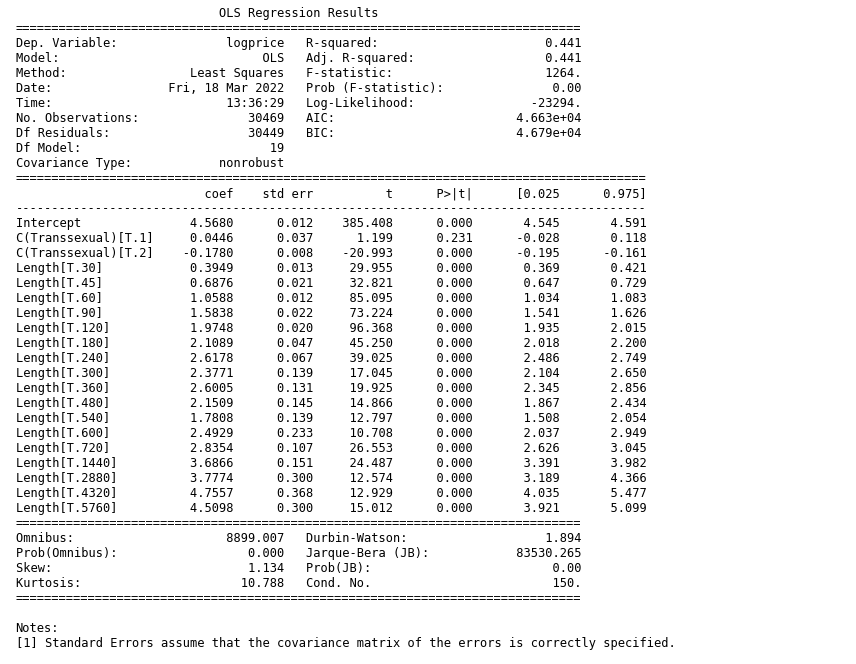

In [101]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_1.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_1.png')

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     200.6
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.82e-87
Time:                        13:38:23   Log-Likelihood:                -31956.
No. Observations:               30470   AIC:                         6.392e+04
Df Residuals:                   30467   BIC:                         6.394e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.4393    

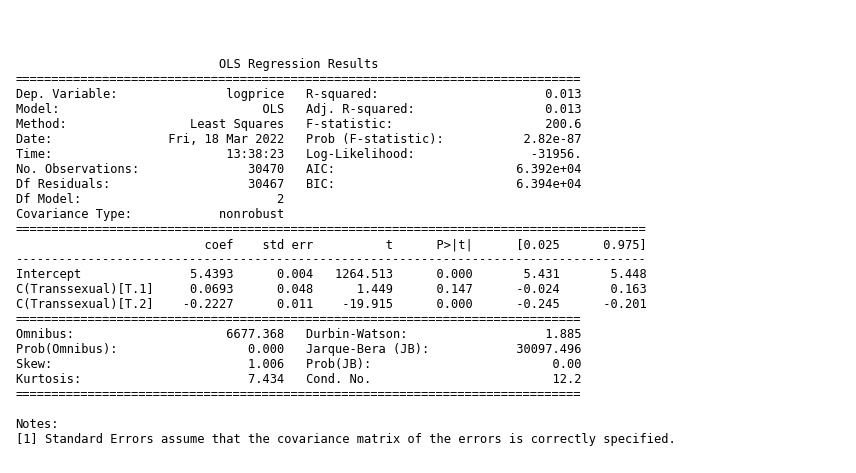

In [102]:
result_2 = sm.ols(formula="logprice~ C(Transsexual) ", data=df).fit()
print(result_2.summary())
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_2.summary()), {'fontsize': 12}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_2.png')

In [103]:
result_3 = sm.ols(formula="logprice ~ C(Transsexual)+ Length+ C(Service_x)+C(Service_y) ", data=df).fit()
print(result_3.summary())



                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     647.9
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:38:54   Log-Likelihood:                -22081.
No. Observations:               30469   AIC:                         4.425e+04
Df Residuals:                   30424   BIC:                         4.463e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [105]:
result_4 = sm.ols(formula="logprice ~ C(Transsexual)+ C(Incall) +Length+ C(Service_x)+C(Service_y) +C(Agency) + C(City)+C(On_Time)+ C(Porn_Star)+ C(Languages)+ C(Other_City_Serviced)+ C(Phone_Type)+ C(Smokes)+ C(Availability)+ C(Services_Delivered_As_Promised)+ C(Build)+ C(Ethnicity)+ Age+ C(Eye_Color)+ C(Hair_Color)+ C(Hair_Type)+ C(Hair_Length)+ C(Piercings)+ C(Pussy)+ C(Photo_Accurate)+ C(Height)+ C(Breast_Size)+ C(Breast_Cup)+ C(Breast_Implants)+ C(Breast_Appearance)+ C(Tattoos)+ C(Massage)+ C(Sex)+ C(Blow_Job)+ C(Cum_In_Mouth)+ C(Touch_Pussy)+ C(Kiss)+ C(Two_Girl_Action)+ C(More_Than_One_Guy_At_A_Time)+ C(Multiple_Pops_Allowed)+ C(Squirt)+ C(Female_Condom)+ C(Massage_Quality)+C(S_M)+ C(Lick_Pussy)+ C(Anal)+ C(Will_Bring_Second_Provider)+ C(Full_No_Rush_Session)+ C(Rimming)+C(Allow_Film_Or_Picture)+ C(Rimming)+ C(Allow_Film_Or_Picture)+ C(Transsexual_Functionality)+ C(Transsexual_Versatility)+ C(Transsexual_Circumcised)+ C(Transsexual_Ejaculates)+ C(Transsexual_Cock_Size) +C(Agency_Name)", data=df).fit()
print(result_4.summary())



                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     29.14
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:49:33   Log-Likelihood:                -8956.0
No. Observations:               22483   AIC:                         2.182e+04
Df Residuals:                   20531   BIC:                         3.747e+04
Df Model:                        1951                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

/var/folders/z1/w6v_285x6wv5slq1n63cc2980000gn/T/ipykernel_64811/3411119331.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


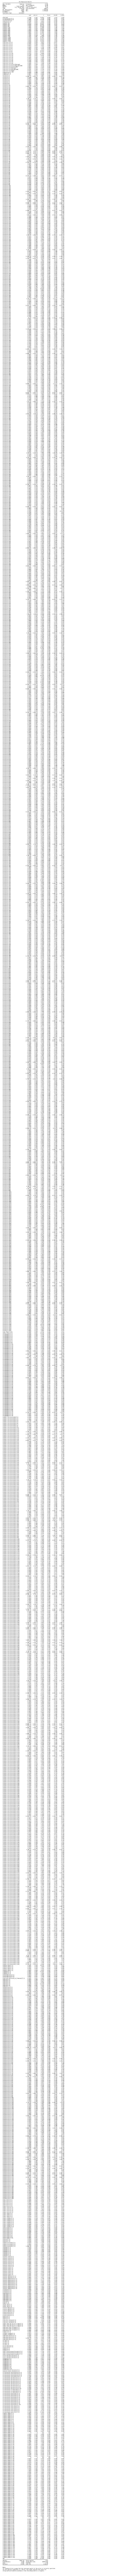

In [106]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(result_4.summary()), {'fontsize': 5}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('result_4.pdf')

In [108]:
print(result_4.summary())



                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     29.14
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:54:04   Log-Likelihood:                -8956.0
No. Observations:               22483   AIC:                         2.182e+04
Df Residuals:                   20531   BIC:                         3.747e+04
Df Model:                        1951                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [131]:
result_6 = sm.ols(formula="Price_length ~ C(Transsexual)", data=df).fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_length   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     17.71
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           2.06e-08
Time:                        14:09:34   Log-Likelihood:            -1.2541e+05
No. Observations:               30469   AIC:                         2.508e+05
Df Residuals:                   30466   BIC:                         2.509e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.0912    

### Premières statistiques descriptives

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


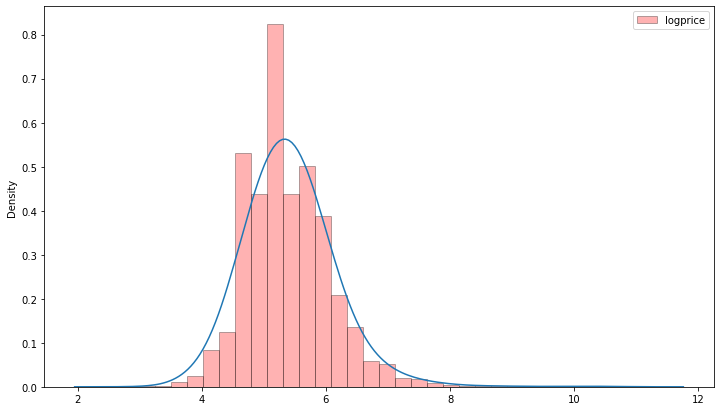

In [109]:
#distribution du log du prix
plt.figure(figsize=(12,7))
plt.hist(df['logprice'], edgecolor='black', bins=30, alpha=.3, density=True, color='red', label='logprice')
g = sns.kdeplot(np.array(df['logprice']), bw=0.5)
plt.legend()
plt.savefig('distrib_logprice.png')
plt.show()

In [110]:
df.groupby('Transsexual', as_index=False)['Price_length'].mean()

,Transsexual,Price_length
0,0,6.091210
1,1,5.017284
2,2,4.676116


In [111]:
df.groupby('Transsexual', as_index=False)['Length'].mean()

,Transsexual,Length
0,0,55.800815
1,1,83.000000
2,2,52.193570


In [112]:
df.groupby('Transsexual', as_index=False)['Price'].mean()

,Transsexual,Price
0,0,351.299639
1,1,275.333333
2,2,229.823845


In [113]:
df['Price'].value_counts()

200    3981
300    2884
100    2384
150    2154
120    1715
       ... 
199       1
369       1
124       1
872       1
207       1
Name: Price, Length: 229, dtype: int64

In [114]:
df['Transsexual'].value_counts()

0    25781
2     4479
1      210
Name: Transsexual, dtype: int64

In [115]:
df.groupby(["Transsexual", "Sex"]).size()

Transsexual  Sex
0            0       1453
             1       2096
             2      22232
1            0         56
             1         14
             2        140
2            0        336
             1        106
             2       4037
dtype: int64

In [116]:
df.groupby(['Transsexual', 'S_M']).size()

Transsexual  S_M
0            0      18715
             1        344
             2       1378
             3       4864
             4        480
1            0        196
             3         14
2            0       3233
             1         59
             2        324
             3        792
             4         71
dtype: int64

In [117]:
df.groupby(['Transsexual', 'Anal']).size()

Transsexual  Anal
0            0       14499
             1        8030
             2         970
             3        2282
1            0          84
             3         126
2            0         919
             1         276
             2         168
             3        3116
dtype: int64

In [118]:
df.groupby(['Transsexual', 'Blow_Job']).size()

Transsexual  Blow_Job
0            0            1775
             1            1836
             2            6884
             3           15286
1            0              56
             1              14
             2              56
             3              84
2            0             443
             1             208
             2            1728
             3            2100
dtype: int64

In [119]:
df.groupby(['Transsexual', 'Cum_In_Mouth']).size()

Transsexual  Cum_In_Mouth
0            0               10735
             1                7679
             2                 336
             3                4289
             4                2742
1            0                 154
             1                  28
             3                  14
             4                  14
2            0                2429
             1                1439
             2                 105
             3                 294
             4                 212
dtype: int64

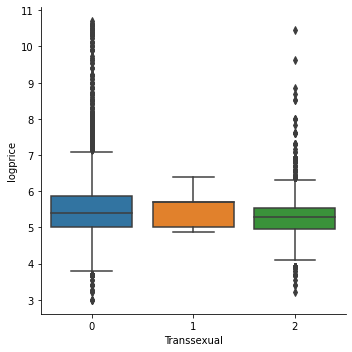

In [120]:
sns.catplot(x="Transsexual", y="logprice", kind='box',data=df)
plt.savefig('moustache_prix.png')

In [121]:
sns.displot(df.groupby('Transsexual', as_index=False)['Price'], x="logprice", hue="Transsexual", kind="kde", fill=True)

ValueError: Could not interpret value `logprice` for parameter `x`

In [122]:
df.index.duplicated()
df.loc[~df.index.duplicated(), :]
df.flags.allows_duplicate_labels = False


DuplicateLabelError: Index has duplicates.
                                               positions
label                                                   
0      [0, 4689, 10126, 11824, 13621, 19464, 21485, 2...
1      [1, 4690, 10127, 11825, 13622, 19465, 21486, 2...
2      [2, 4691, 10128, 11826, 13623, 19466, 21487, 2...
3      [3, 4692, 10129, 11827, 13624, 19467, 21488, 2...
4      [4, 4693, 10130, 11828, 13625, 19468, 21489, 2...
...                                                  ...
5474                                      [10125, 19070]
2560                                [2545, 24042, 29431]
4899                                      [18497, 26374]
4942                                      [18540, 26416]
5192                                      [18790, 26666]

[5472 rows x 1 columns]

In [152]:
df.index.is_unique

False

#### Visualisation et statistiques descriptives

In [ ]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, fmt=".2f")

In [139]:
df2 = df.copy()

In [140]:

df2 = df.drop_duplicates(subset=['Phone'], keep='first')

In [141]:
df2['Transsexual'].value_counts()

No              18812
Yes - Preop      4351
Yes - Postop       15
Name: Transsexual, dtype: int64

In [128]:
df2

,Service_x,Length,Price,Agency,City,Phone,Incall/Outcall,On Time,Porn Star,Languages,Service_y,Other City Serviced,Phone Type,Smokes,Availability,Services Delivered As Promised,Build,Ethnicity,Age,Eye Color,Hair Color,Hair Type,Hair Length,Piercings,Pussy,Photo Accurate,Height,Transsexual,Breast Size,Breast Cup,Breast Implants,Breast Appearance,Tattoos,_x,Massage,Sex,Blow Job,Cum In Mouth,Touch Pussy,Kiss,Two Girl Action,More Than One Guy At A Time,Multiple Pops Allowed,Squirt,Female Condom,Massage Quality,S&M,Lick Pussy,Anal,Will Bring Second Provider,"Full, No-Rush Session",Rimming,Allow Film Or Picture,_y,Unnamed: 55,Transsexual Functionality,Transsexual Versatility,Transsexual Cock Size (when Erect),Transsexual Circumcised,Transsexual Ejaculates,Phone 2,Phone 2 Type,Agency Name,Unnamed: 0,Unnamed: 56,Unnamed: 58,Unnamed: 5,Unnamed: 57,etats,States,pays
0,Escort Incall,30 minutes,$200,Don't know,"Baltimore, MD",(267) 248-9429(267) 248-9429,Incall,Yes,No,"English, Spanish",None,None,Text Message,No,Don't Know,Yes,Curvy,Latina,21 - 25,Brown,Black,Straight,Mid Back,Don't Know,Shaved,Photos accurate,"5'6"" - 5'8""",Yes - Postop,34-35,C,Yes,Rock Hard,Don't Know,NaN,Don't Know,Yes,Yes - Without Condom,Don't Know,Don't Know,Yes - With Tongue,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Yes,Don't Know,Don't Know,Receive - Yes,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,US
1,Escort Outcall,60 minutes,$150,Independent,"Tijuana, Mexico",(557) 439-4818(557) 439-4818,Incall/Outcall,Yes,No,Spanish,None,None,Other,No,Daytime/Nighttime,Yes,Average,Spanish,26 - 30,Black,Black,Straight,Mid Back,Don't Know,Don't Know,Photos accurate,"4'9"" - 4'11""",Yes - Postop,34-35,D,Yes,Rock Hard,Don't Know,NaN,No,Yes,Yes - Without Condom,Don't Know,Don't Know,Yes - With Tongue,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Yes,Don't Know,Don't Know,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mexico,Mexico
2,Escort Incall,60 minutes,$300,Don't know,"Boston, MA",(617) 932-5556(617) 932-5556,Incall,Yes,No,English,Escort/Massage,None,Provider Picks Up,No,Don't Know,Yes,Curvy,Asian,26 - 30,Brown,Brown,Straight,Shoulder Length,None,Partially Shaved,Photos accurate,"5'6"" - 5'8""",Yes - Postop,34-35,C,Yes,Super Nice,A Few,NaN,Yes - Topless,Yes,Yes - Without Condom,Don't Know,Yes - On The Outside,No,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Average,Don't Know,Yes,Yes,Don't Know,Yes,Don't Know,Don't Know,NaN,Massage and Blow Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MA,US
3,Escort Incall,30 minutes,$300,Don't know,"Los Angeles, CA",(323) 364-5987(323) 364-5987,Incall,Yes,No,English,Escort/Massage,None,Text Message,No,Daytime,Yes,Slender,Asian,21 - 25,Brown,Black,Straight,Mid Back,Don't Know,Shaved,Photos accurate,"5'6"" - 5'8""",Yes - Postop,34-35,C,Yes,Super Nice,Don't Know,NaN,Yes - Topless,Yes,Don't Know,Don't Know,Yes - On The Outside,No,Don't Know,Don't Know,No,Don't Know,Don't Know,Average,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,NaN,Massage Hand Job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,US
4,Massage,45 minutes,$300,Agency,"Van Nuys, CA",(310) 862-6106(310) 862-6106,Incall,No,No,English,Escort/Massage,None,Text Message,Yes - But Not During Session,Daytime/Nighttime,No,Very muscular,White,41 - 45,Green,Other,Other,Mid Back,Belly Button,Don't Know,Not accurate (Photoshopped),"5'3"" - 5'5""",Yes - Postop,Smaller Than 30,FLAT,No,Flat,Many,NaN,Yes - Topless,Don't Know,No,Don't Know,No,No,Don't Know,Don't Know,Don't Know,Don't Know,Don't Know,Below Average,No,No,Don't Know,Don't Know,No,Don't Know,Don't Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [130]:
df2['pays'].value_counts()

US                 21590
 Canada              437
 United Kingdom      248
 Mexico              162
 Germany              87
                   ...  
 Luxembourg            1
 Bulgaria              1
 Honduras              1
 Macao                 1
 Kazakhstan            1
Name: pays, Length: 66, dtype: int64

In [142]:
df3 = df2[df2.pays == 'US']

In [135]:
len(df2)

21590

In [137]:
df2['Transsexual'].value_counts()


No              17463
Yes - Preop      4113
Yes - Postop       14
Name: Transsexual, dtype: int64

In [138]:
df['Transsexual'].value_counts()

No              25880
Yes - Preop      4500
Yes - Postop      210
Name: Transsexual, dtype: int64

In [143]:
df2['Transsexual'].value_counts()

No              18812
Yes - Preop      4351
Yes - Postop       15
Name: Transsexual, dtype: int64

On a donc trois datasets : 
* df : tout le monde
* df2 : on enlève les doublons
* df3 : à partir de df2, on ne garde que les Américaines 